In [1]:
import matplotlib.pyplot as plt
import numpy as np
from stl import mesh as msh
from mpl_toolkits import mplot3d

In [4]:
def map_to_3d(inpPts, inpMesh):
    ''' Maps an Nx2 numpy array of points in the yz plane to have an x coordinate based on the nearest point in the y-z plane on the input mesh
    Inputs:
        inpPts: Nx2 numpy array with y coordinates in column 0, and z coordinates in column 1
        inpMesh: numpy-stl mexh object with the target mesh
    Outputs:
        out: Nx3 numpy array with x coordinates in column 0, y coordinates in column 1, and z coordinates in column 2
    '''
    # create a list of vertices from the vectors of each triangle in the mesh
    vert = np.around(np.unique(inpMesh.vectors.reshape([int(inpMesh.vectors.size/3), 3]), axis=0),2)
    
    # select only vertices on the ventral stomach
    vert_ventral = vert[vert[:, 0] < 8.9]
    
    # initial output array
    out = np.zeros((inpPts.shape[0], 3))
    
    # iterate over all points in y-z plane and find the closest mesh vertex in this plane
    for i, pt in enumerate(inpPts):      
        min_arg = np.argmin(np.sqrt(np.sum(np.power(np.abs((pt-vert_ventral[:, 1:3])),2), 1)))
        matched_x = vert_ventral[min_arg, 0]
        out[i, :] = [pt[0], pt[1], matched_x]
    return out

[[13.715644   17.253308    1.77999997]
 [19.98856     9.302295    4.55999994]
 [17.089456    5.248453    3.27999997]
 [ 7.018884    8.558111    2.42000008]
 [ 4.662302   21.698826    2.92000008]
 [10.545279   13.689061    0.09      ]]


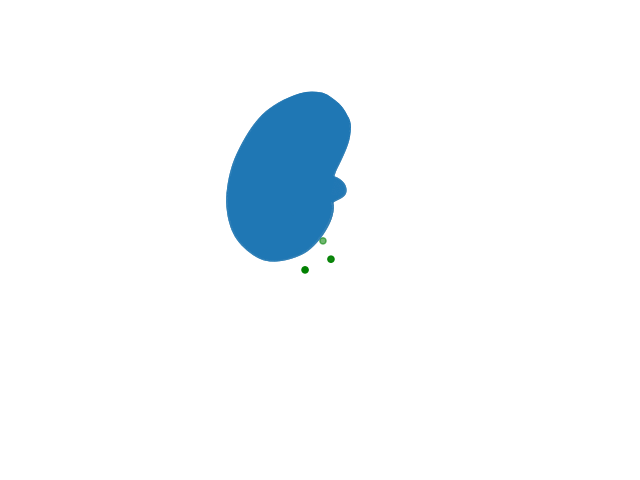

In [6]:
# this enables interactivity in jupyterlab
%matplotlib widget 

# start a matplotlib 3d interactive figure
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Load the STL files and add the vectors to the plot
your_mesh = msh.Mesh.from_file('../stom_surf_mesh.stl')

# with coordinate axes (imported with signs reversed)
your_mesh.x -= np.min(your_mesh.x.flatten())
your_mesh.y -= np.min(your_mesh.y.flatten())
your_mesh.z -= np.min(your_mesh.z.flatten())

# add triangle polygons to 3d matplotlib view
ax.add_collection3d(mplot3d.art3d.Poly3DCollection(your_mesh.vectors))

# test data in 2D
data_array = np.array([[13.715644,17.253308],
[19.988560,9.302295],
[17.089456,5.248453],
[7.018884,8.558111],
[4.662302,21.698826],
[10.545279,13.689061]])
# convert input data to numpy array
data_twoDim = np.array(data_array)
# data_intensity = data_twoDim[:,2]
data_threeDim = map_to_3d(data_twoDim[:, :], your_mesh)
print(data_threeDim)
ax.scatter(data_threeDim[:,0], data_threeDim[:,1], data_threeDim[:,2], c='g')

# Scale view to the mesh size
ax.set_xlim(0,40)
ax.set_ylim(-10,30)
ax.set_zlim(-10,30)
ax.axis('off')

plt.show()